In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Carrega o dataset como dataframe
df = pd.read_csv('dataset/video_games_2016.csv')

In [37]:
# Remove NAs
# df.dropna(inplace=True)

# Remove outliers
Q1 = df['Global_Sales'].quantile(0.00)
Q3 = df['Global_Sales'].quantile(0.98)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

In [38]:
fill_0 = [
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
]

fill_mean = [
    'Year_of_Release',
    'Global_Sales'
]

for c in fill_0 :
    df[c] = df[c].fillna(0)

for c in fill_mean :
    df[c] = df[c].fillna(df[c].mean())


In [39]:
# Cria coluna com a região que mais vendeu
column_to_number = {
    'NA_Sales':    "NA",
    'EU_Sales':    "EU",
    'JP_Sales':    "JP",
    'Other_Sales': "Outro" 
}

df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)

/tmp/ipykernel_1380810/1998209741.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


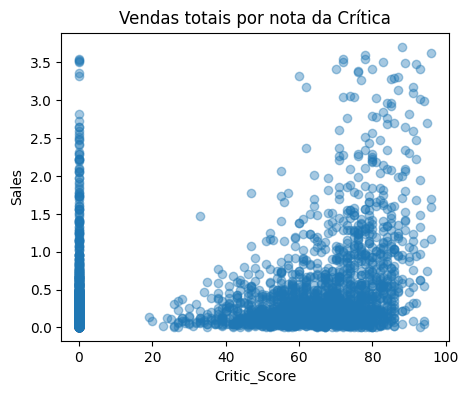

In [40]:
dffi = df.copy()
dffi = dffi[ dffi[ "Genre"] == "Action"  ]
plt.figure(figsize=(5, 4))
plt.scatter( 
  dffi['Critic_Score'],
  dffi['Global_Sales'],

  cmap='viridis',
  alpha=.4
)

plt.ylabel('Sales')
plt.xlabel('Critic_Score')

plt.title('Vendas totais por nota da Crítica')

plt.show()

/tmp/ipykernel_1380810/95157867.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


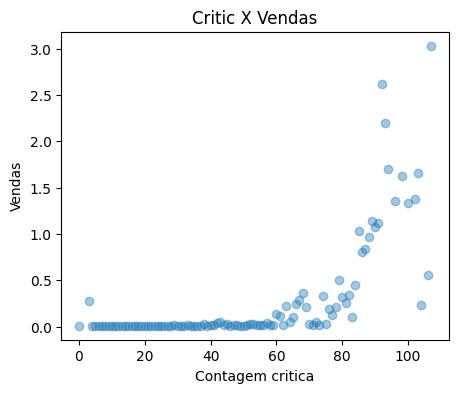

In [41]:

fdf = df.copy()
# fdf = fdf[ fdf["Global_Sales"] > 0  ]

gp_step_size = 5
fdf["Critic_Count_Range"] = fdf[ "Critic_Count" ] // gp_step_size

min_sales = fdf.groupby('Critic_Count')['Global_Sales'].min().reset_index()

plt.figure(figsize=(5, 4))
plt.scatter( 
  min_sales['Critic_Count'],
  min_sales['Global_Sales'],

  cmap='viridis',
  alpha=.4
)

plt.ylabel('Vendas')
plt.xlabel('Contagem critica')

plt.title('Critic X Vendas')

plt.show()

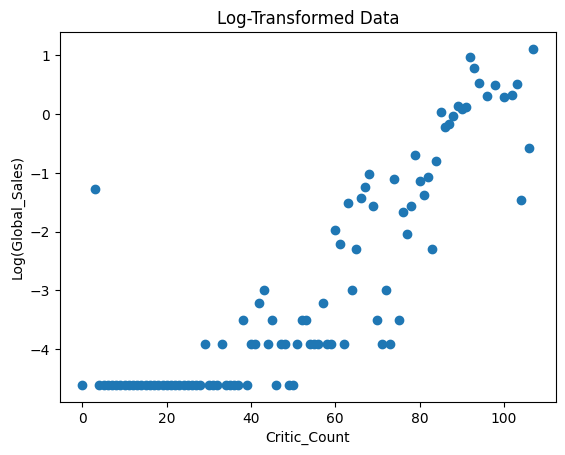

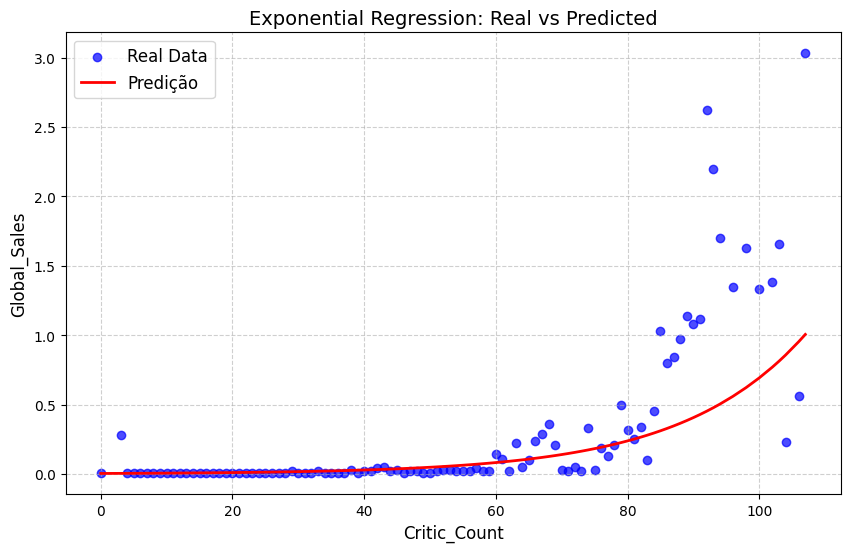

R²: 0.7338724930847009


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

fdf = min_sales

xcol = "Critic_Count"
ycol = "Global_Sales"

X = fdf[[xcol]].values
y = fdf[ycol].values
y = np.log(y)

plt.scatter(fdf[xcol], np.log(fdf[ycol]))
plt.title("Log-Transformed Data")
plt.xlabel(xcol)
plt.ylabel(f"Log({ycol})")
plt.show()

xtrain, ytrain, xtest, ytest = train_test_split(X, y)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, np.exp(y), color='blue', label='Real Data', alpha=0.7)
plt.plot(X, np.exp(y_pred), color='red', label=f'Predição', linewidth=2)
plt.title('Exponential Regression: Real vs Predicted', fontsize=14)
plt.xlabel(xcol, fontsize=12)
plt.ylabel(ycol, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print( f"R²: {model.score(X, y)}" )

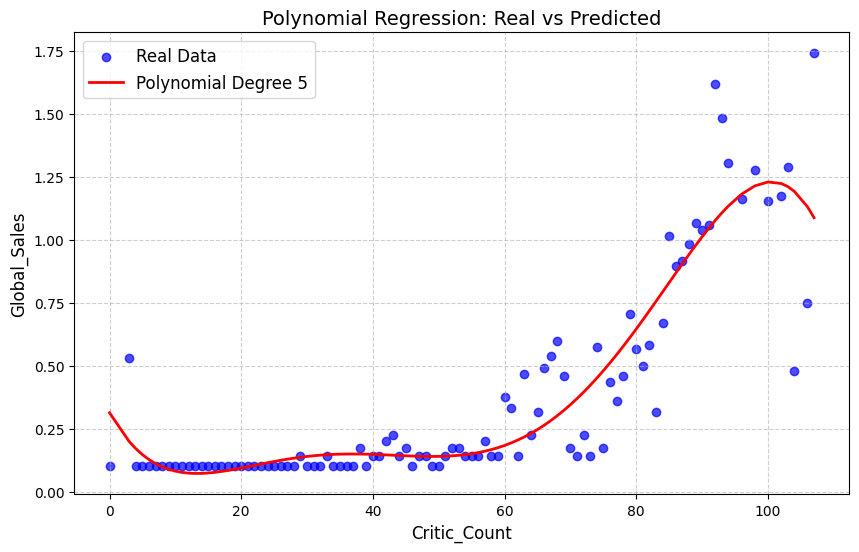

R²: 0.8295986400884447


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

fdf = min_sales

xcol = "Critic_Count"
ycol = "Global_Sales"

X = fdf[[xcol]].values
y = fdf[ycol].values

degree = 5

# Transforming X for polynomial features
poly = PolynomialFeatures(degree=degree)
y = np.sqrt(y)
X_poly = poly.fit_transform(X)

xtrain, ytrain, xtest, ytest = train_test_split(X_poly, y)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
# y_pred = np.maximum(y_pred, 0)  

plt.figure(figsize=(10, 6))
plt.scatter(fdf[xcol], y, color='blue', label='Real Data', alpha=0.7)
plt.plot(fdf[xcol], y_pred, color='red', label=f'Polynomial Degree {degree}', linewidth=2)
plt.title('Polynomial Regression: Real vs Predicted', fontsize=14)
plt.xlabel(xcol, fontsize=12)
plt.ylabel(ycol, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print( f"R²: {model.score(X_poly, y)}" )

/tmp/ipykernel_1380810/3479053195.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


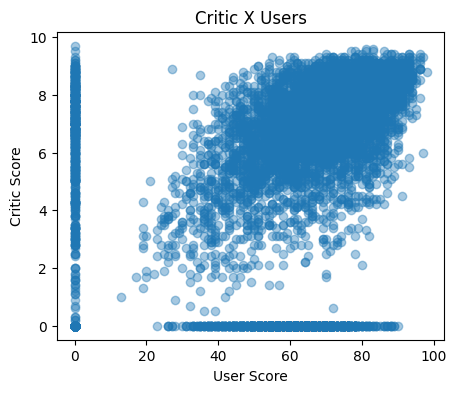

In [44]:
fdf = df

plt.figure(figsize=(5, 4))
plt.scatter( 
  fdf['Critic_Score'],
  fdf['User_Score'],

  cmap='viridis',
  alpha=.4
)

plt.ylabel('Critic Score')
plt.xlabel('User Score')

plt.title('Critic X Users')

plt.show()

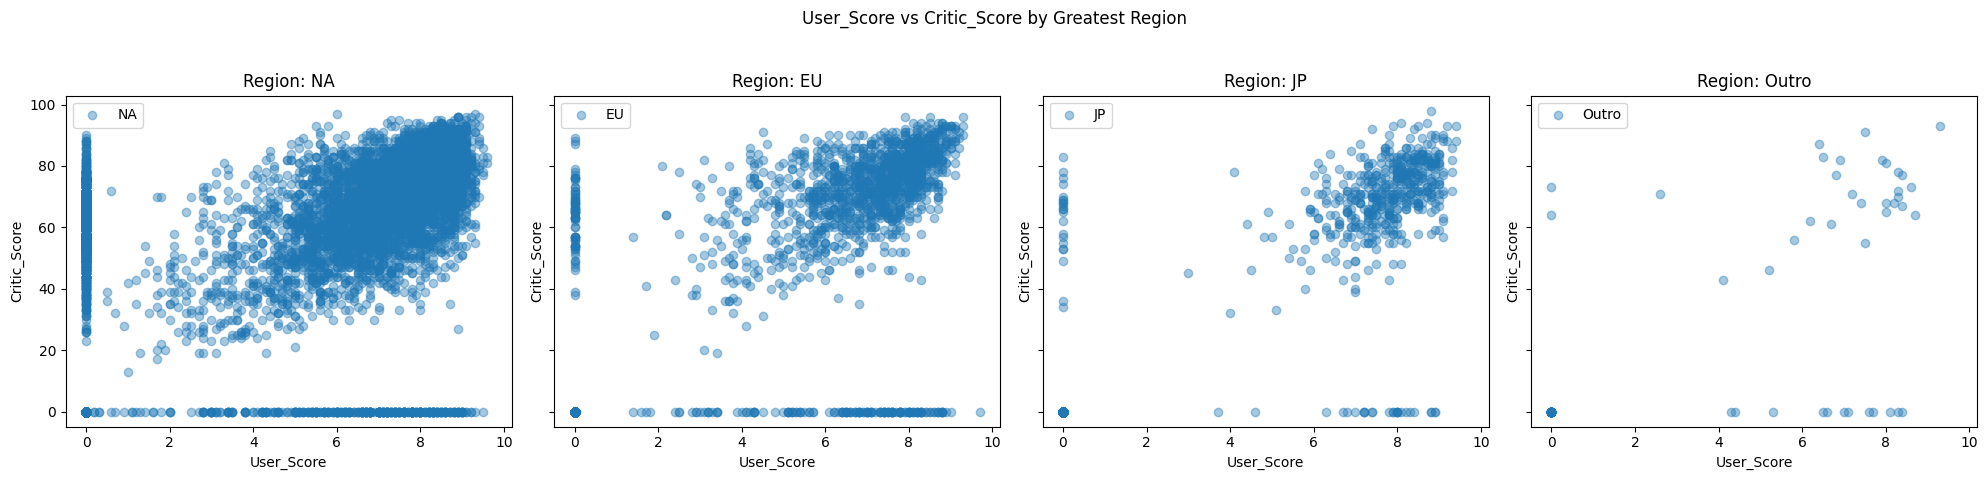

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle("User_Score vs Critic_Score by Greatest Region")

regions = ["NA", "EU", "JP", "Outro"]

for i, region in enumerate(regions):
    ax = axes[i]
    filtered_df = df[df["Greatest"] == region]
    ax.scatter(
        filtered_df["User_Score"], 
        filtered_df["Critic_Score"], 
        label=region, alpha=0.4
    )
    ax.set_title(f"Region: {region}")
    ax.set_xlabel("User_Score")
    ax.set_ylabel("Critic_Score")
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

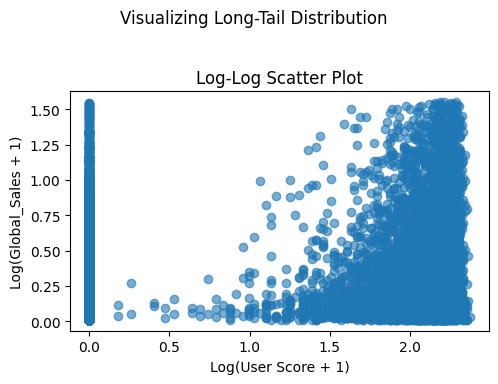

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
fig.suptitle("Visualizing Long-Tail Distribution")

# 1. Log-Log Scatter Plot
axes.scatter(np.log1p(df["User_Score"]), np.log1p(df["Global_Sales"]), alpha=0.6)
axes.set_title("Log-Log Scatter Plot")
axes.set_xlabel("Log(User Score + 1)")
axes.set_ylabel("Log(Global_Sales + 1)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

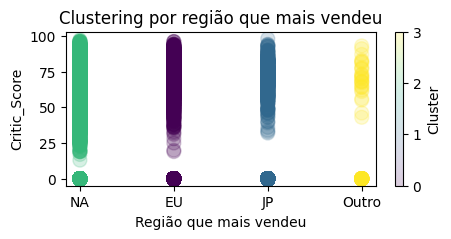

In [47]:
# from sklearn.cluster import KMeans
# from sklearn.linear_model import LinearRegression
from kmodes.kmodes import KModes 

# Colunas para embasar a clusterização
X = df[[ "Greatest" ]]

# Numero de clusters
n_clusters = 4

cluster_k = KModes( n_clusters=n_clusters, random_state=42 )
# cluster_k = KMeans( n_clusters=n_clusters, random_state=42 )

df['Cluster'] = cluster_k.fit_predict(X)

plt.figure(figsize=(5, 2))
plt.scatter( 
  df['Greatest'],
  df['Critic_Score'],

  c=df['Cluster'],
  cmap='viridis',
  s=100,
  alpha=0.2 
)

plt.xlabel('Região que mais vendeu')
plt.ylabel('Critic_Score')

plt.colorbar(label='Cluster')
plt.title('Clustering por região que mais vendeu')

plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

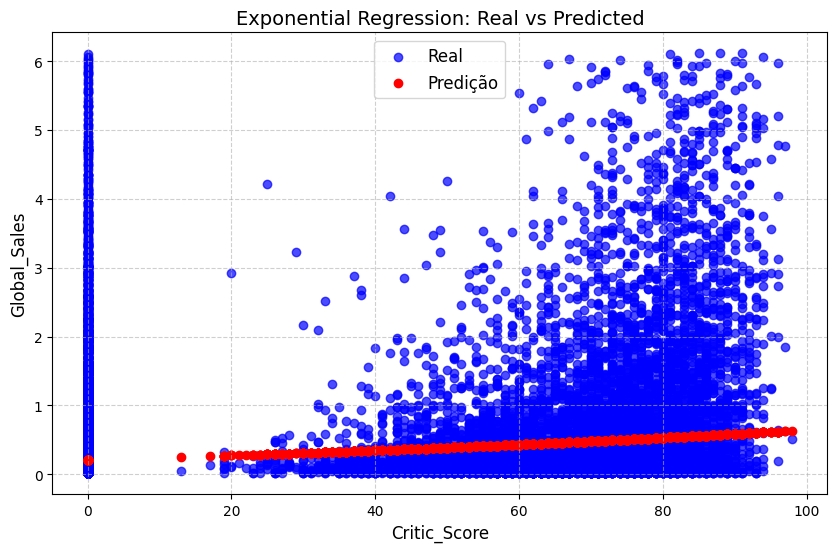

R²: 0.08165200619573088


In [49]:
fdf = df.copy()
xcol = "Critic_Score"
ycol = "Global_Sales"

X = fdf[[xcol]].values
y = fdf[ycol].values

y = np.log1p( y )
y = np.sqrt( y )

model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, np.square(np.expm1(y)), color='blue', label='Real', alpha=0.7)
plt.scatter(X, np.square(np.expm1(y_pred)), color='red', label='Predição')
plt.title('Exponential Regression: Real vs Predicted', fontsize=14)
plt.xlabel(xcol, fontsize=12)
plt.ylabel(ycol, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print( f"R²: {model.score(X, y)}" )


In [50]:
target = 'Global_Sales'

numeric_features = [ 
    'Critic_Score', 
]  

categorical_features = [
    'Genre',
    'Platform',
    'Publisher',
    "Developer",
    "Rating"
]  

df = df.dropna(subset=[target] + numeric_features)  
df[categorical_features] = df[categorical_features].fillna('NA')  

X = df[numeric_features + categorical_features]
y = df[ target ]  

y = np.log(y)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])


In [52]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Critic_Score']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Genre', 'Platform',
                                                   'Publisher', 'Developer',
                                                   'Rating'])])),
                ('regressor', LinearRegression())])

In [53]:
y_pred_log = model_pipeline.predict(X_test)

y_test = np.exp(y_test)
y_pred = np.exp(y_pred_log)

/home/wolke/Documents/datascience/topicos-4/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


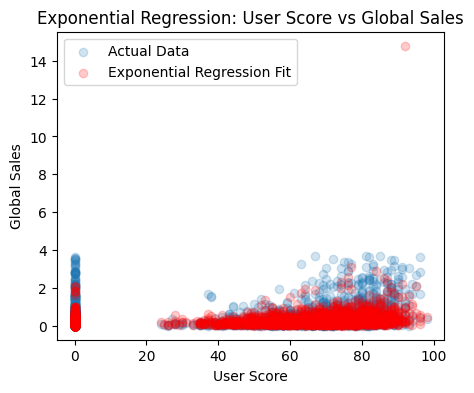

In [54]:
# Scatter plot of actual data
plt.figure(figsize=(5, 4))
plt.scatter(X_test['Critic_Score'], y_test, alpha=0.2, label='Actual Data')

# Plot the exponential regression line (prediction line)
plt.scatter(X_test["Critic_Score"], y_pred, color='red', alpha=0.2, label='Exponential Regression Fit')

# Labels and legend
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.title('Exponential Regression: User Score vs Global Sales')
plt.legend()
plt.show()

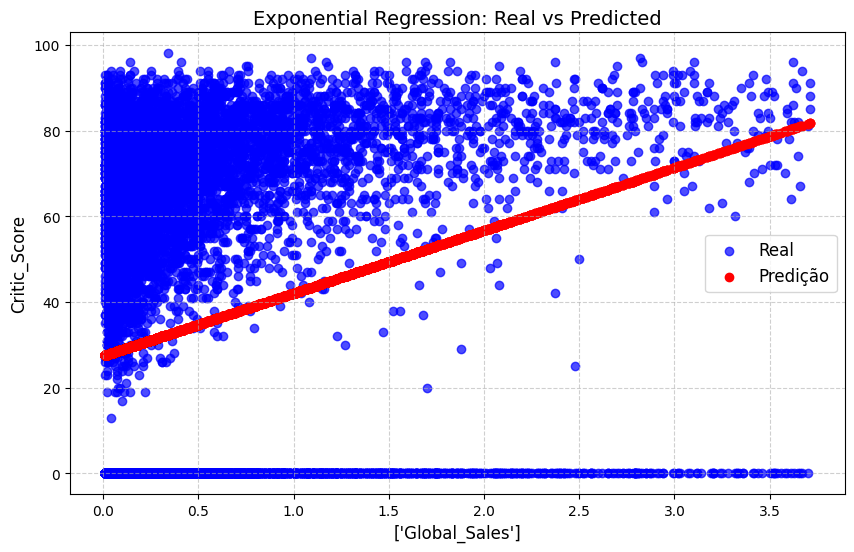

R²: 0.054622326175629676


In [58]:
fdf = df.copy()
fdf = fdf[ fdf["Global_Sales"] > 0 ]
xcol = [ "Global_Sales" ]
ycol = "Critic_Score"

X = fdf[xcol].values
y = fdf[ycol].values


model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, (y), color='blue', label='Real', alpha=0.7)
plt.scatter(X, (y_pred), color='red', label='Predição')
plt.title('Exponential Regression: Real vs Predicted', fontsize=14)
plt.xlabel(xcol, fontsize=12)
plt.ylabel(ycol, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print( f"R²: {model.score(X, y)}" )
